load the save file

In [63]:
from pathlib import Path
import operator, joblib
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [64]:
import joblib
import numpy as np
from sklearn import decomposition
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# settings for our plots later
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [65]:
(A, terms, file_names) = joblib.load("/Users/yishan/Documents/OneDrive/fall 21/inf2209/corpus/txt3/articles-tfidf-2.pkl")
print("Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]))


Loaded 291 X 4510 document-term matrix


In [66]:
A.shape

(291, 4510)

Try a model to see if the file is ok

In [67]:
k = 40


In [68]:
# create the model, specifiying the initialization strategy and the number of topics to produce
model = decomposition.NMF(init="nndsvd", n_components=k) 
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [69]:
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [70]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 20 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d:\n%s\n" % ( topic_index+1, str_descriptor ) )


Topic 01:
community, town, county, temple, leaders, gentry, magistrate, charitable, xiang, society, government, organization, managers, units, militia, associations, public, tax, households, institutions

Topic 02:
women, woman, female, male, girls, writers, poetry, gender, education, talent, feet, literary, letters, husband, daughters, sexual, writing, talented, shen, europe

Topic 03:
documents, council, grand, memorials, archives, ing, materials, collection, palace, secretariat, volumes, museum, copies, researchers, date, archival, holdings, record, records, department

Topic 04:
legal, judicial, law, code, cases, magistrate, crime, punishment, victim, justice, punishments, criminal, crimes, county, court, advisors, pan, magistrates, prison, sentenced

Topic 05:
genealogy, genealogies, lineage, data, vital, information, birth, records, lineages, registers, dates, demographic, suzhou, males, date, age, populations, name, recorded, complete

Topic 06:
ethnic, research, historical, sch

In [71]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

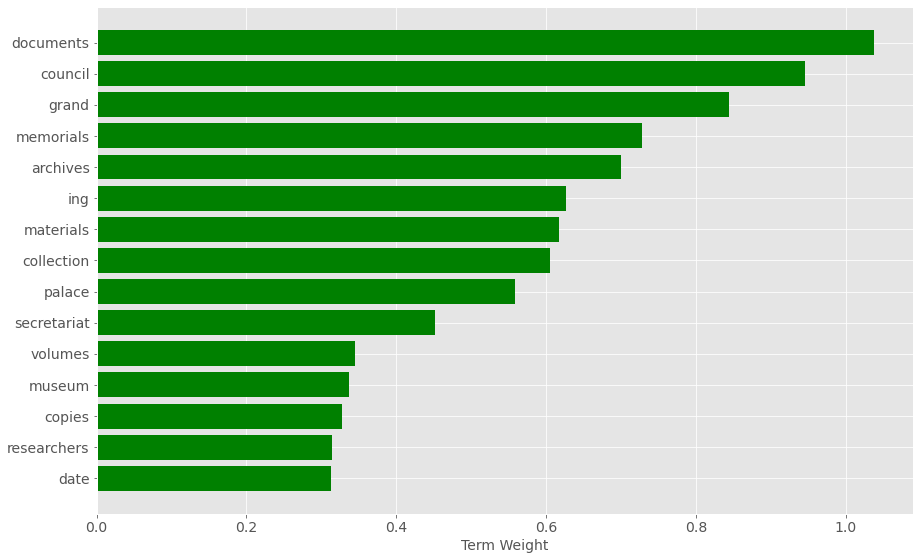

In [72]:
plot_top_term_weights(terms, H, 2, 15)


# choose the best k for NMF
code adapted from https://github.com/fred-ss/topic-model-tutorial/blob/master/3%20-%20Parameter%20Selection%20for%20NMF.ipynb

In [75]:
kmin, kmax = 15, 50


In [76]:
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=15 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=16 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=17 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=18 ...
Applying NMF for k=19 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=20 ...
Applying NMF for k=21 ...
Applying NMF for k=22 ...
Applying NMF for k=23 ...
Applying NMF for k=24 ...
Applying NMF for k=25 ...
Applying NMF for k=26 ...
Applying NMF for k=27 ...
Applying NMF for k=28 ...
Applying NMF for k=29 ...
Applying NMF for k=30 ...
Applying NMF for k=31 ...
Applying NMF for k=32 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=33 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=34 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=35 ...
Applying NMF for k=36 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=37 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=38 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=39 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=40 ...
Applying NMF for k=41 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=42 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=43 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=44 ...
Applying NMF for k=45 ...
Applying NMF for k=46 ...
Applying NMF for k=47 ...
Applying NMF for k=48 ...
Applying NMF for k=49 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=50 ...


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [78]:
import pandas as pd
df2 = pd.read_csv('/Users/yishan/Documents/OneDrive/fall 21/inf2209/corpus/txt3/processed.csv')

In [79]:
df2

file_name                                              text2
0       06-1-1-55  the spatial structure of ming local administra...
1      06-1-56-82  kuo lu  a sworn brotherhood organizationin sze...
2     06-1-83-112  tax revolt in late qing china  the small sword...
3       06-2-1-12  china and world historyr  bin wong division of...
4      06-2-25-36  seeing through pictures and poetry a history o...
..            ...                                                ...
286  42-1-131-175  heroes within bowshot examination administrati...
287  42-1-177-220  from dynastic state to imperial nation interna...
288    42-1-45-91  artisanal luxury and confucian statecraft the ...
289   42-1-93-129  reimagining qing space yongzheng’s eurasian at...
290   42-1-95-130  promotion  patronage  and poetic socialization...

[291 rows x 2 columns]

In [80]:
import nltk
from nltk import word_tokenize
texts = df2['text2'].apply(word_tokenize).to_list()

In [81]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['however','huang','university','stanford',
                   'zhang','wang','many','new','even','however,',
                   'well','li','zhi','first','three','liu','wu',
                   'also','china','chinese','late','ch','two','one','see',
                   'century','would','qing','could','imperial','ji','dai'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yishan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
texts = df2['text2'].to_list()

In [83]:
import re
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

In [84]:
docgen = TokenGenerator( texts, stop_words )
# the model has 500 dimensions, the minimum document-term frequency is 20
w2v_model = gensim.models.Word2Vec(docgen, vector_size=500, min_count=20, sg=1)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


In [85]:
print("Model has %d terms" % len(w2v_model.wv.key_to_index))


Model has 9154 terms


In [86]:
from pathlib import Path
import re, joblib
from itertools import combinations
import numpy as np
from sklearn import decomposition
import gensim
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.wv.similarity(pair[0], pair[1]) )
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [88]:
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

In [253]:
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 20 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 20 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

K=15: Coherence=0.4112
K=16: Coherence=0.4257
K=17: Coherence=0.4213
K=18: Coherence=0.4288
K=19: Coherence=0.4214
K=20: Coherence=0.4278
K=21: Coherence=0.4231
K=22: Coherence=0.4241
K=23: Coherence=0.4297
K=24: Coherence=0.4238
K=25: Coherence=0.4269
K=26: Coherence=0.4226
K=27: Coherence=0.4241
K=28: Coherence=0.4216
K=29: Coherence=0.4190
K=30: Coherence=0.4212
K=31: Coherence=0.4206
K=32: Coherence=0.4199
K=33: Coherence=0.4102
K=34: Coherence=0.4129
K=35: Coherence=0.4166
K=36: Coherence=0.4133
K=37: Coherence=0.4117
K=38: Coherence=0.4100
K=39: Coherence=0.4099
K=40: Coherence=0.4127
K=41: Coherence=0.4049
K=42: Coherence=0.4122
K=43: Coherence=0.4054
K=44: Coherence=0.4079
K=45: Coherence=0.4088
K=46: Coherence=0.4047
K=47: Coherence=0.4027
K=48: Coherence=0.4104
K=49: Coherence=0.4065
K=50: Coherence=0.4083


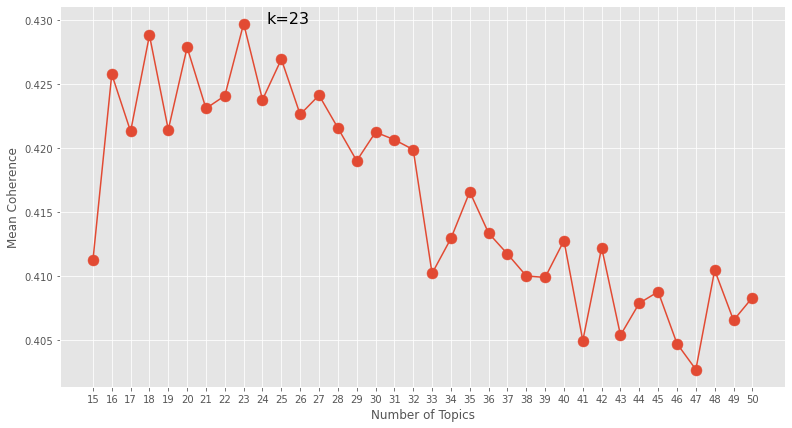

In [94]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter(k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

In [205]:
from sklearn.metrics import jaccard_score

NMF_jaccard_scores = []
for i in range(0, len(topic_models)):
    jaccards = [0]
    for j in range(0, i-1):
        t1 = get_descriptor( terms, topic_models[i][2], j, 20 )
        t2 = get_descriptor( terms, topic_models[i][2], j+1, 20 )
        jaccards.append(jaccard_similarity(t1, t2))
    mean = sum(jaccards)/len(jaccards)
    NMF_jaccard_scores.append(mean)
    print("topic_num = %d:, jaccard=%.4f" %  (i+15, mean))


topic_num = 15:, jaccard=0.0000
topic_num = 16:, jaccard=0.0000
topic_num = 17:, jaccard=0.0000
topic_num = 18:, jaccard=0.0000
topic_num = 19:, jaccard=0.0132
topic_num = 20:, jaccard=0.0103
topic_num = 21:, jaccard=0.0043
topic_num = 22:, jaccard=0.0073
topic_num = 23:, jaccard=0.0064
topic_num = 24:, jaccard=0.0028
topic_num = 25:, jaccard=0.0051
topic_num = 26:, jaccard=0.0047
topic_num = 27:, jaccard=0.0043
topic_num = 28:, jaccard=0.0039
topic_num = 29:, jaccard=0.0037
topic_num = 30:, jaccard=0.0034
topic_num = 31:, jaccard=0.0048
topic_num = 32:, jaccard=0.0091
topic_num = 33:, jaccard=0.0057
topic_num = 34:, jaccard=0.0081
topic_num = 35:, jaccard=0.0013
topic_num = 36:, jaccard=0.0074
topic_num = 37:, jaccard=0.0097
topic_num = 38:, jaccard=0.0103
topic_num = 39:, jaccard=0.0065
topic_num = 40:, jaccard=0.0062
topic_num = 41:, jaccard=0.0079
topic_num = 42:, jaccard=0.0057
topic_num = 43:, jaccard=0.0046
topic_num = 44:, jaccard=0.0044
topic_num = 45:, jaccard=0.0103
topic_nu

In [259]:
sum(NMF_jaccard_scores)/len(NMF_jaccard_scores)

0.006075661446832366

In [261]:
import statistics
statistics.median(NMF_jaccard_scores)


0.005925925925925925

In [245]:
metrics = pd.concat([k_values_series, coherences_series, NMF_jaccard_scores_series], axis=1)

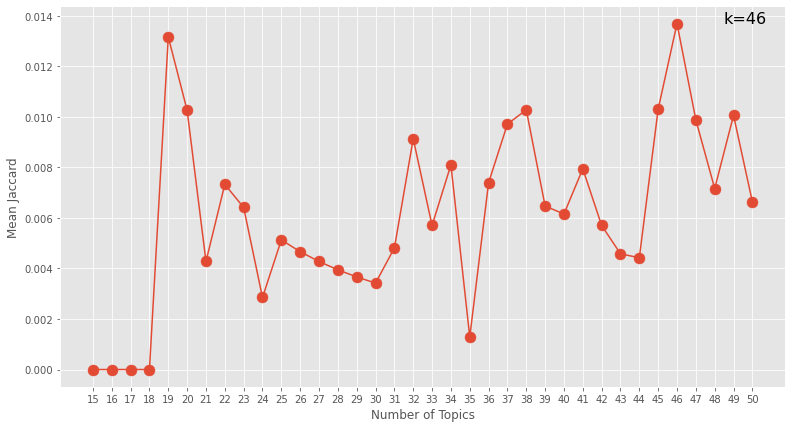

In [256]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, NMF_jaccard_scores )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Jaccard")
# add the points
plt.scatter(k_values, NMF_jaccard_scores, s=120)
# find and annotate the maximum point on the plot
ymax = max(NMF_jaccard_scores)
xpos = NMF_jaccard_scores.index(ymax)
best_k = k_values[xpos]
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

# LDA Model


In [126]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import numpy as np
from gensim.models import LdaModel, CoherenceModel
import gensim.corpora as corpora
import itertools
from collections import Counter
import datetime
from gensim import models

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yishan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [110]:
df = pd.read_csv('/Users/yishan/Documents/OneDrive/fall 21/inf2209/corpus/txt3/processed.csv')

In [122]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = sent_to_words(df['text2'])
data_words = list(data_words)

In [123]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
            if word not in stop_words] for doc in texts]

In [124]:
data_words = remove_stopwords(data_words)


In [129]:
import gensim.corpora as copora

id2word = copora.Dictionary(data_words)


In [130]:
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [131]:
#try a model
from pprint import pprint

num_topics = 30

lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word = id2word, num_topics = num_topics)

pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]

[(10,
  '0.004*"local" + 0.004*"ming" + 0.004*"officials" + 0.003*"early" + '
  '0.003*"people" + 0.002*"manchu" + 0.002*"system" + 0.002*"official" + '
  '0.002*"emperor" + 0.002*"court"'),
 (8,
  '0.004*"local" + 0.003*"people" + 0.003*"women" + 0.003*"time" + '
  '0.002*"ming" + 0.002*"state" + 0.002*"emperor" + 0.002*"early" + '
  '0.002*"case" + 0.002*"family"'),
 (19,
  '0.004*"women" + 0.003*"local" + 0.003*"ming" + 0.003*"family" + '
  '0.002*"time" + 0.002*"state" + 0.002*"officials" + 0.002*"people" + '
  '0.002*"official" + 0.002*"social"'),
 (18,
  '0.004*"local" + 0.003*"people" + 0.002*"state" + 0.002*"time" + '
  '0.002*"ming" + 0.002*"system" + 0.002*"women" + 0.002*"officials" + '
  '0.002*"county" + 0.002*"official"'),
 (1,
  '0.004*"local" + 0.003*"ming" + 0.003*"officials" + 0.002*"emperor" + '
  '0.002*"time" + 0.002*"people" + 0.002*"state" + 0.002*"government" + '
  '0.002*"women" + 0.002*"early"'),
 (5,
  '0.004*"emperor" + 0.004*"local" + 0.002*"time" + 0.002*"

In [133]:
LDA_Models={}

for k in range(kmin,kmax+1):
    print("Applying LDA for k=%d ..." % k )
    model = gensim.models.LdaMulticore(corpus=corpus, id2word = id2word, num_topics = k)
    LDA_Models[k] = model

Applying LDA for k=15 ...
Applying LDA for k=16 ...
Applying LDA for k=17 ...
Applying LDA for k=18 ...
Applying LDA for k=19 ...
Applying LDA for k=20 ...
Applying LDA for k=21 ...
Applying LDA for k=22 ...
Applying LDA for k=23 ...
Applying LDA for k=24 ...
Applying LDA for k=25 ...
Applying LDA for k=26 ...
Applying LDA for k=27 ...
Applying LDA for k=28 ...
Applying LDA for k=29 ...
Applying LDA for k=30 ...
Applying LDA for k=31 ...
Applying LDA for k=32 ...
Applying LDA for k=33 ...
Applying LDA for k=34 ...
Applying LDA for k=35 ...
Applying LDA for k=36 ...
Applying LDA for k=37 ...
Applying LDA for k=38 ...
Applying LDA for k=39 ...
Applying LDA for k=40 ...
Applying LDA for k=41 ...
Applying LDA for k=42 ...
Applying LDA for k=43 ...
Applying LDA for k=44 ...
Applying LDA for k=45 ...
Applying LDA for k=46 ...
Applying LDA for k=47 ...
Applying LDA for k=48 ...
Applying LDA for k=49 ...
Applying LDA for k=50 ...


In [147]:
LDA_Topics = {}
for num in range(kmin,kmax+1):
    LDA_Topics[num] = LDA_Models[num].print_topics()

In [155]:
LDA_Topics

{15: [(0,
   '0.004*"officials" + 0.004*"ming" + 0.003*"women" + 0.003*"local" + 0.002*"emperor" + 0.002*"state" + 0.002*"official" + 0.002*"early" + 0.002*"law" + 0.002*"people"'),
  (1,
   '0.004*"local" + 0.004*"officials" + 0.002*"emperor" + 0.002*"ming" + 0.002*"time" + 0.002*"people" + 0.002*"women" + 0.002*"court" + 0.002*"government" + 0.002*"thus"'),
  (2,
   '0.004*"women" + 0.003*"local" + 0.003*"ming" + 0.003*"state" + 0.002*"early" + 0.002*"officials" + 0.002*"time" + 0.002*"social" + 0.002*"people" + 0.002*"family"'),
  (3,
   '0.004*"local" + 0.003*"women" + 0.003*"officials" + 0.003*"time" + 0.002*"official" + 0.002*"manchu" + 0.002*"ming" + 0.002*"emperor" + 0.002*"people" + 0.002*"system"'),
  (4,
   '0.005*"local" + 0.003*"ming" + 0.003*"officials" + 0.002*"official" + 0.002*"emperor" + 0.002*"early" + 0.002*"government" + 0.002*"people" + 0.002*"state" + 0.002*"thus"'),
  (5,
   '0.004*"local" + 0.003*"officials" + 0.003*"ming" + 0.002*"people" + 0.002*"time" + 0.00

In [156]:
LDA_coherence_scores = {}
for num in range(kmin, kmax+1):       
    print("COMPUTING Coherence for k = %d ..." % k )
    LDA_coherence_scores[num] = [CoherenceModel(model=LDA_Models[i], texts=data_words, dictionary=id2word, coherence='c_v').get_coherence()\
              for i in range(kmin, kmax)]
    

COMPUTING Coherence for k = 50 ...


Process AccumulatingWorker-513:
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.8/multiprocessing/process.py", line 318, in _bootstrap
    util._exit_function()
  File "/Applications/anaconda3/lib/python3.8/multiprocessing/util.py", line 360, in _exit_function
    _run_finalizers()
  File "/Applications/anaconda3/lib/python3.8/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/Applications/anaconda3/lib/python3.8/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/Applications/anaconda3/lib/python3.8/multiprocessing/queues.py", line 195, in _finalize_join
    thread.join()
  File "/Applications/anaconda3/lib/python3.8/threading.py", line 1011, in join
    self._wait_for_tstate_lock()
  File "/Applications/anaconda3/lib/python3.8/threading.py", line 1027, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt
Process AccumulatingWorker-515:
Tr

KeyboardInterrupt: 

In [157]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [158]:
import re
from itertools import combinations

In [160]:
LDA_jaccard_scores = []
for i in [*range(kmin, kmax)]:
  jaccards = []
  for j in list(combinations([*range(0,len(LDA_Topics[i]))],2)):
    t1 = LDA_Topics[i][j[0]]
    t2 = LDA_Topics[i][j[1]]
    jaccards.append(jaccard_similarity(set(re.sub("[^A-Za-z ]", "", t1[1]).split("  ")), set(re.sub("[^A-Za-z ]", "", t2[1]).split("  "))))
    mean = sum(jaccards)/len(jaccards)
  LDA_jaccard_scores.append(mean)

In [227]:
LDA_J_S = pd.DataFrame(LDA_jaccard_scores)
LDA_J_S['number_of_topics'] = pd.Series(np.arange(start=15, stop=50))

In [228]:
LDA_J_S = LDA_J_S.set_index('number_of_topics')

check the min in LDA Jaccard score

In [232]:
min(LDA_jaccard_scores)

0.48752323527865316